# Machine Learning: AllLife Bank Personal Loan Campaign

## **Developer Team: Thaison Chu**

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/Loan_Modelling.csv')
#copy data to another variable to avoid any changes to the original data
loan = df.copy()

## Data Overview

* Observations
1.   There are 14 columns including the ID which will not be relevant in the analysis. There are 5000 rows.
2.   12 of the 13 columns are type integer with the one remaining a float.
3.   The ZIPCode and Education column are type integer but are really a category type.  Treating this data as numeric will cause issues with the analysis.  We will need to use one-hot encoding to turn these into binary representations.  
4. There are 467 unique zip codes.  By using One Hot encoding, we will create 466 binary columns to represent the various zip code.  
5.  For Education, we will create two additional binary columns to represent the three levels of education.

* Sanity checks
1.  There are no duplicated data.
2.  There are no NULL data in the data set.
3.  ID column is not needed.  It will be dropped.
4.  The Experience column has negative numbers - gathered from the df.describe() statement.  We will need to get rid of these errors.  

In [ ]:
loan.shape

(5000, 14)

In [ ]:
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#Check if any entries are NULL
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
loan.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
experienceCount=loan['Experience'].value_counts()
print (experienceCount)


 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64


*  The experience column has negative numbers.  Will need to fix this in the preprocessing section.  There are a fair amount of negative numbers: 33 occurrences of -1, 15 occurences of -2 and 4 occurences of -4.

In [ ]:
uniqueZipCodes=loan['ZIPCode'].value_counts()
print(uniqueZipCodes)

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
93077      1
94598      1
Name: ZIPCode, Length: 467, dtype: int64




*   There are 467 unique zip codes in the dataset.



In [ ]:
#checking for duplicated data
df.duplicated().sum()

0

*  There are no duplicated data.

## Data Preprocessing
* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)





In [ ]:
#ID column is not needed so we will drop it below.
loan.drop(["ID"], axis=1, inplace=True)

In [ ]:
# Let's map the values to 1: Undergrad; 2: Graduate 3: Advanced/Professional
loan["Education"].replace(1, "Undergraduate", inplace=True)
loan["Education"].replace(2, "Graduate", inplace=True)
loan["Education"].replace(3, "Professional", inplace=True)

In [ ]:
#Observed in the previous section, there are negative numbers in Education.  Specifically, -1: 33 occurrences, -2: 15 occurrences and -3: 4 occurrences.  Assuming these are just input errors, we will change them from (-) to (+).
loan["Experience"].replace(-1, 1, inplace=True)
loan["Experience"].replace(-2, 2, inplace=True)
loan["Experience"].replace(-3, 3, inplace=True)

In [ ]:
loan["ZIPCode"] = loan["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    loan["ZIPCode"].str[0:2].nunique(),
)
loan["ZIPCode"] = loan["ZIPCode"].str[0:2]

loan["ZIPCode"] = loan["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
loan[cat_cols] = loan[cat_cols].astype("category")

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?  The distribution of mortgage attribe is substantially right skewed.  
2. How many customers have credit cards? 1,470 customers have credit cards.
3. What are the attributes that have a strong correlation with the target attribute (personal loan)? Personal loans have a 50% correlation with income and 37% correlation with the credit card average.
4. How does a customer's interest in purchasing a loan vary with their age?  Based on the correlation and histogram plot of age against the BIN = Personal_Loan, age does not seem to impact the customer's interest in purchasing a loan.  
5. How does a customer's interest in purchasing a loan vary with their education?



## Univariate Analysis



In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

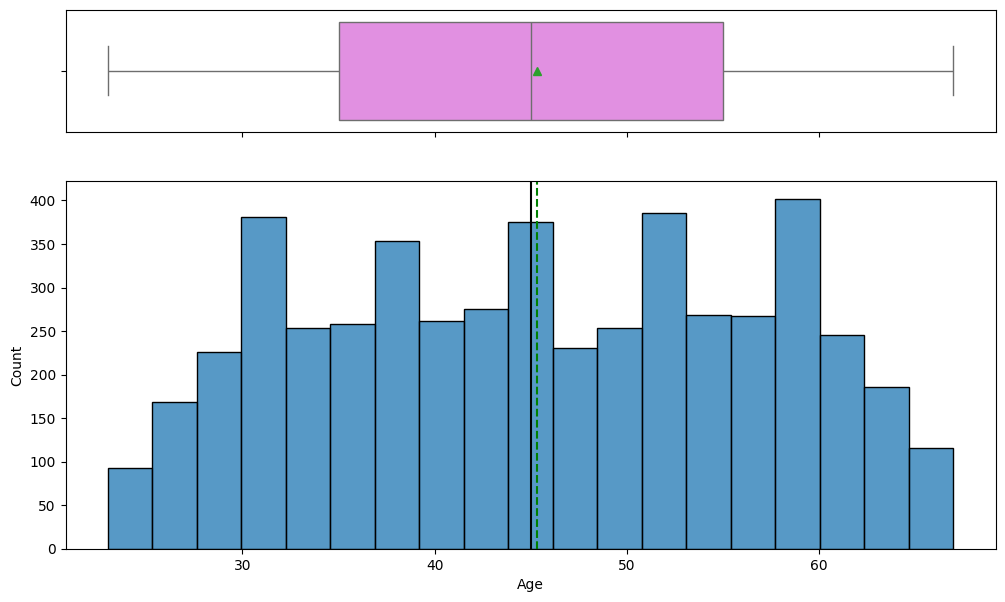

In [ ]:
histogram_boxplot(loan, "Age")

Median age of customers is about 45 years old.  

#### Observations on Experience

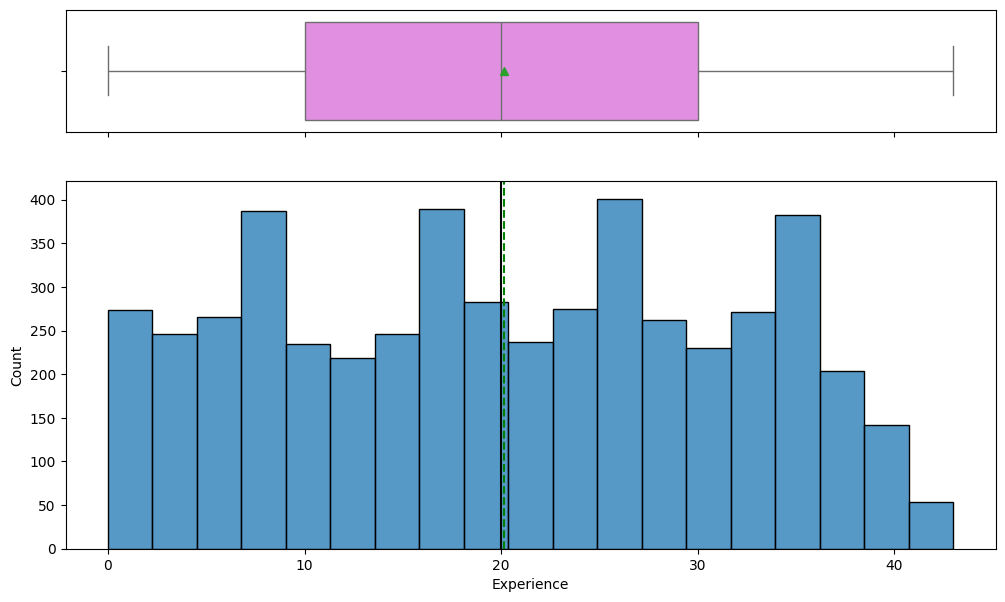

In [ ]:
histogram_boxplot(loan, "Experience")

Median experience is approximately 20 years.

#### Observations on Income

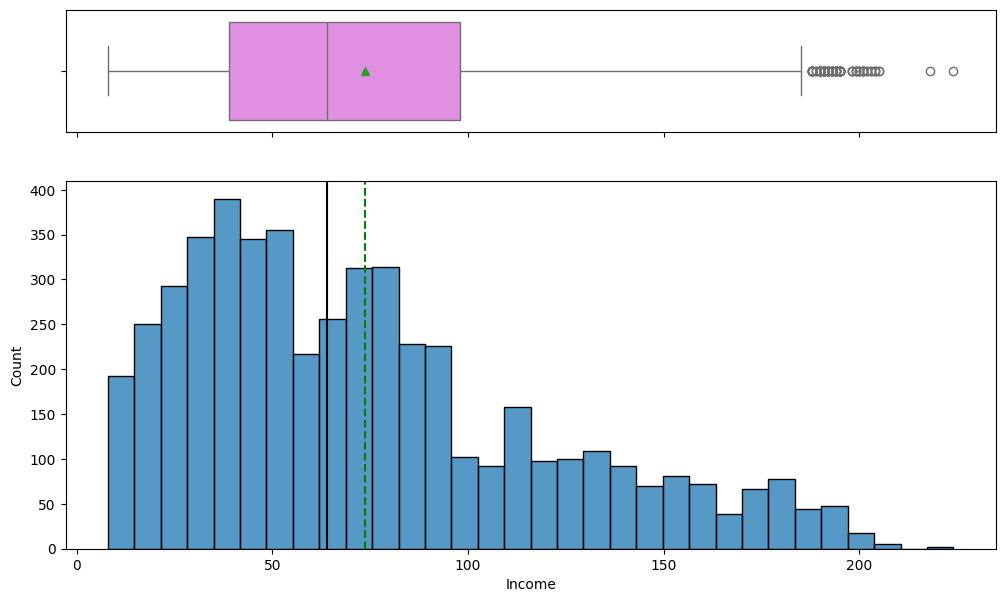

In [ ]:
histogram_boxplot(loan,"Income")

Median income is approximately $62K and the distribution is right skewed.

#### Observations on CCAvg

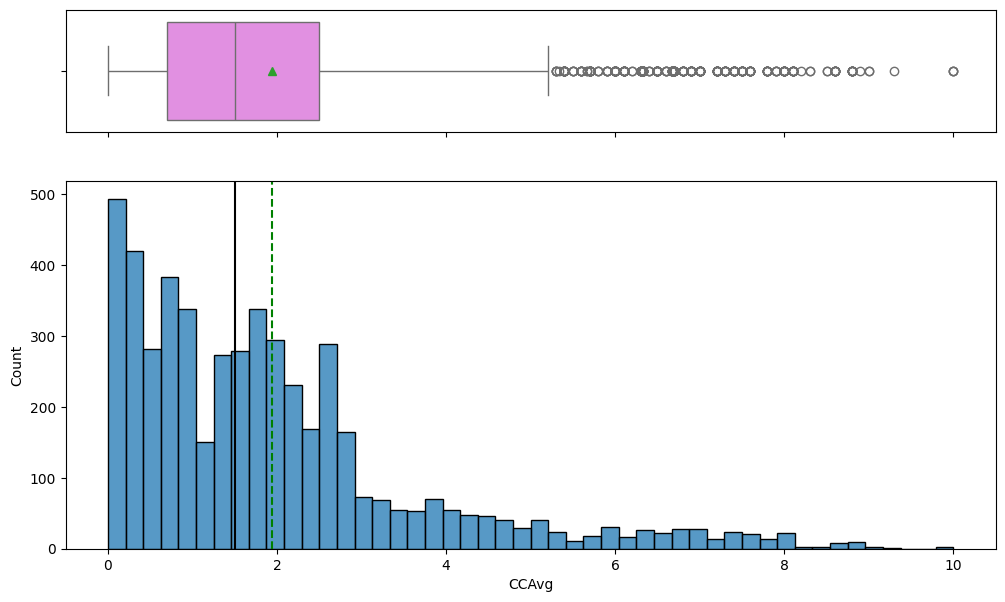

In [ ]:
histogram_boxplot(loan,"CCAvg")

The median CC Average is $1950 and the distribution is right skewed.

#### Observations on Mortgage

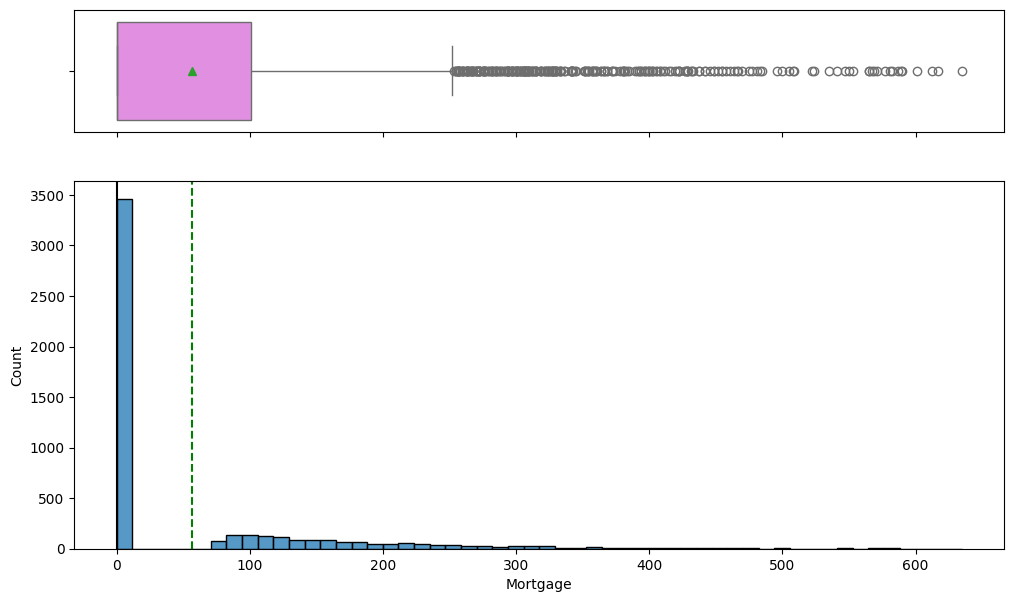

In [ ]:
histogram_boxplot(loan, "Mortgage")

#### Observations on Family

<ipython-input-19-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


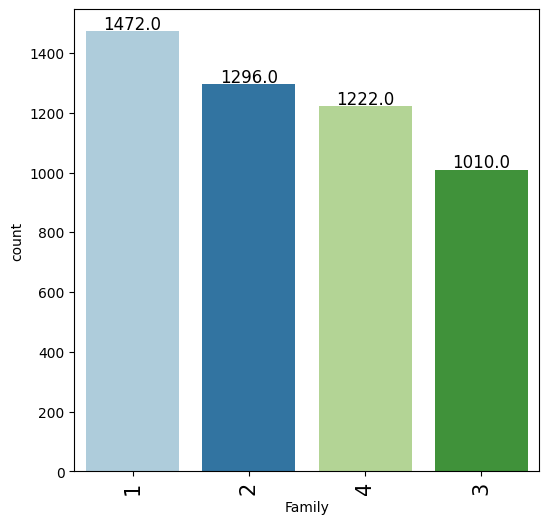

In [ ]:
labeled_barplot(loan, "Family")

####Observations on Education



<ipython-input-19-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


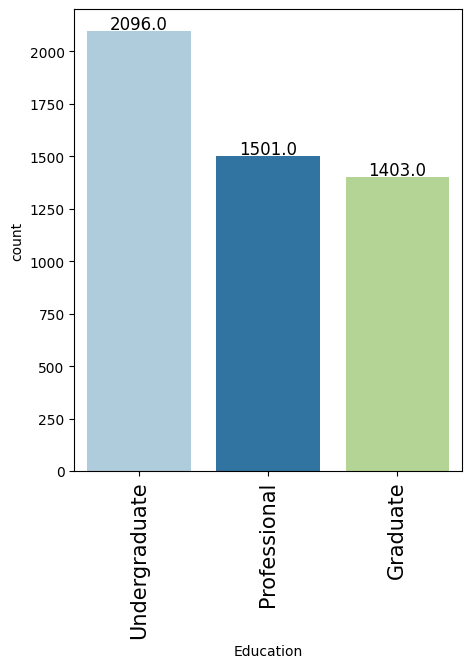

In [ ]:
labeled_barplot(loan, "Education")

####Observations on Securities_Account

<ipython-input-19-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


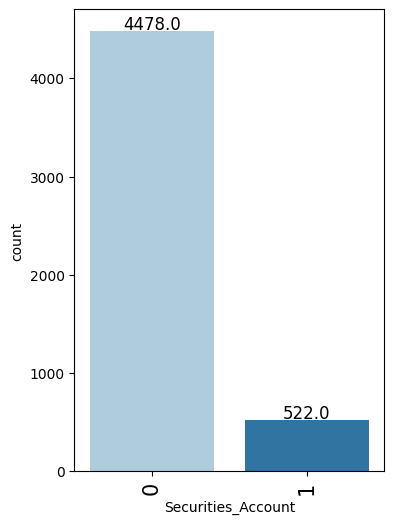

In [ ]:
labeled_barplot(loan, "Securities_Account")

#### Observations on CD_Account

<ipython-input-19-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


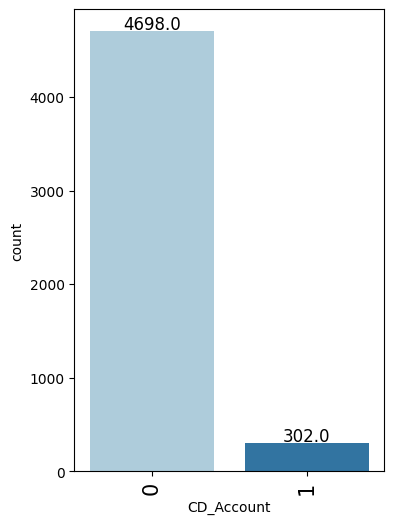

In [ ]:
labeled_barplot(loan, 'CD_Account')

#### Observations on Online

<ipython-input-19-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


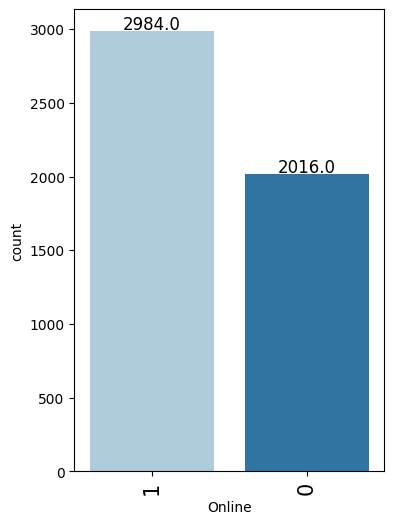

In [ ]:
labeled_barplot(loan, 'Online')

#### Observations on Credit Card

<ipython-input-19-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


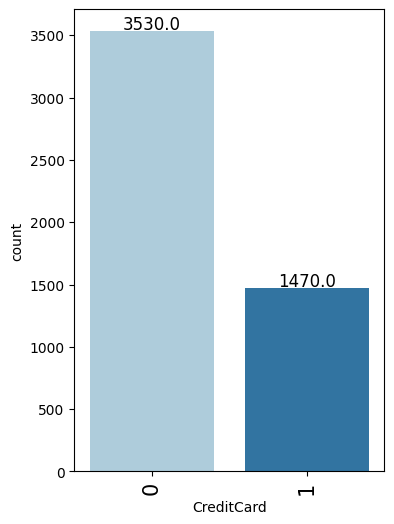

In [ ]:
labeled_barplot(loan, 'CreditCard')

#### Observations on ZIPCode

<ipython-input-19-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


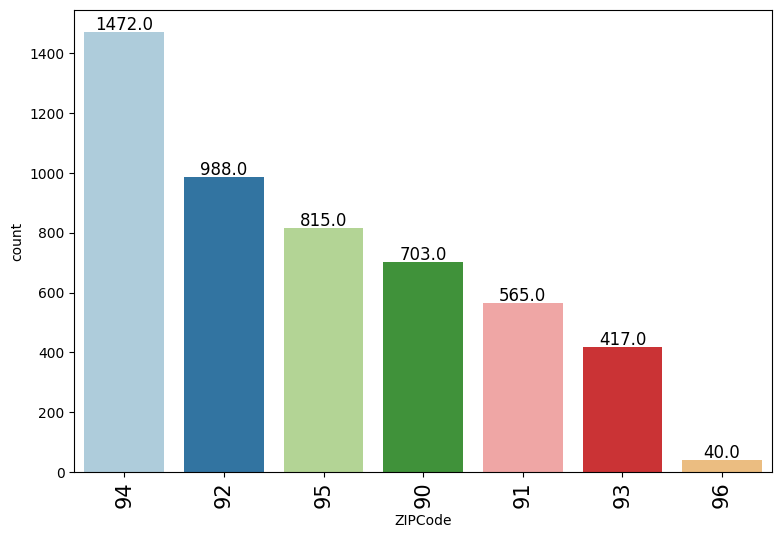

In [ ]:
labeled_barplot(loan, 'ZIPCode')

## Bivariate Analysis

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation Check

<ipython-input-34-570ce565a8aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


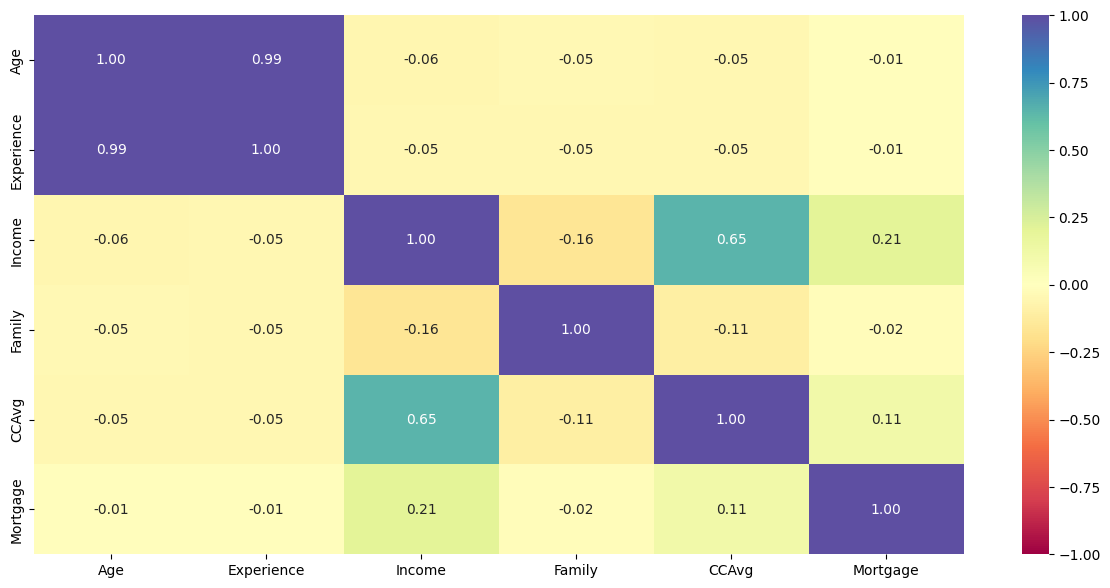

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

1.  Mortgage is not correlated with any other variables on the dataset.  
2.  Personal loans have a 50% correlation with income and 37% correlation with the credit card average and a 32% correlation to a CD Account.  
3.  Personal loans almost no correlation to Age, Experience, Securities account, Online or Credit Card indicator.  


#### Check how purchasing a loan varies with education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


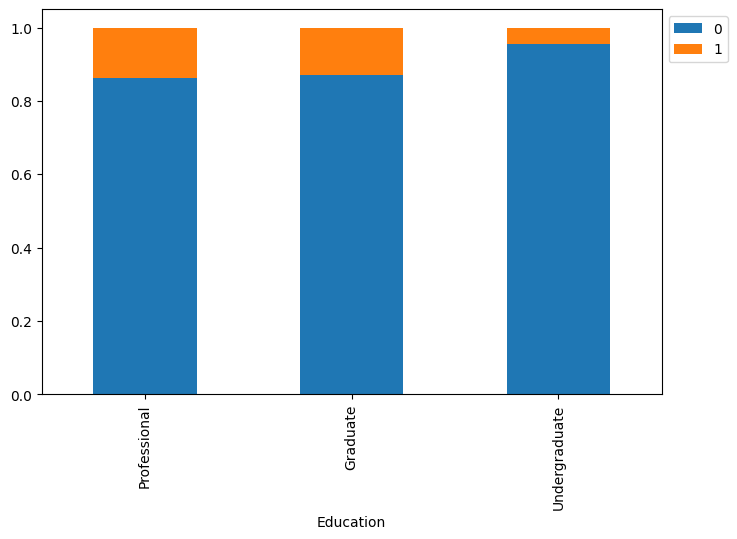

In [ ]:
stacked_barplot(loan, "Education", "Personal_Loan")

Professional and Graduate education is has a higher likelihood of acquiring a personal loan.  

#### Personal loan versus family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


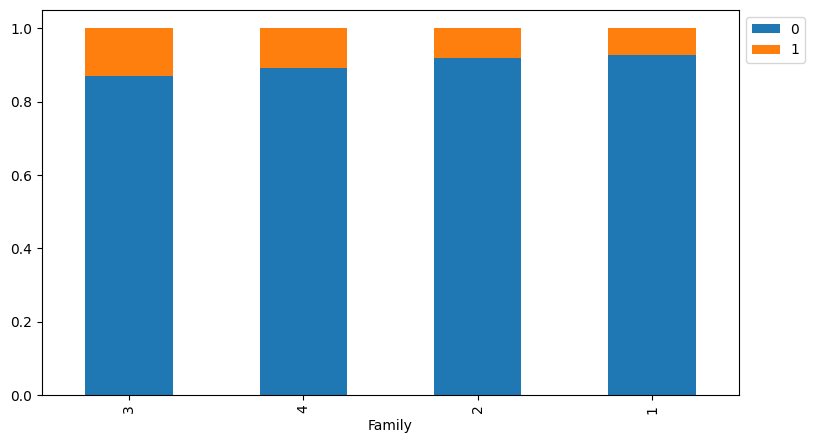

In [ ]:
stacked_barplot(loan, "Family", "Personal_Loan")

Families with more members are more likely to acquire a personal loan.

#### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


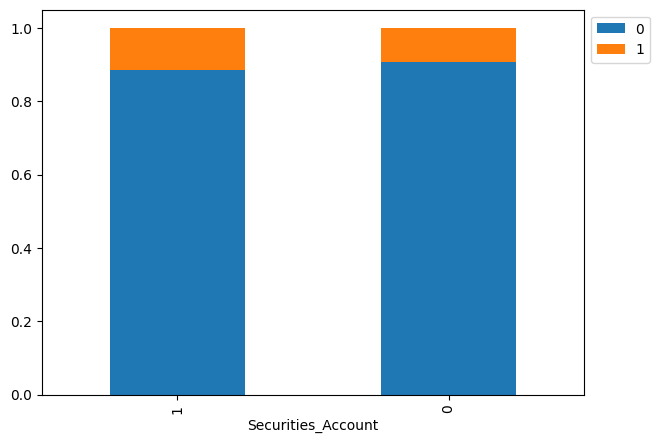

In [ ]:
stacked_barplot(loan, "Securities_Account", "Personal_Loan")

#### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


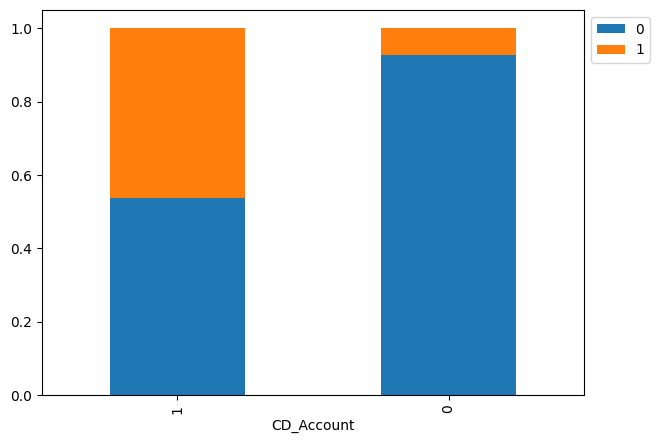

In [ ]:
stacked_barplot(loan, "CD_Account", "Personal_Loan")

CD account is good predictor of a personal loan.  About 45% versus 10% when a customer does not have a CD account.

#### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


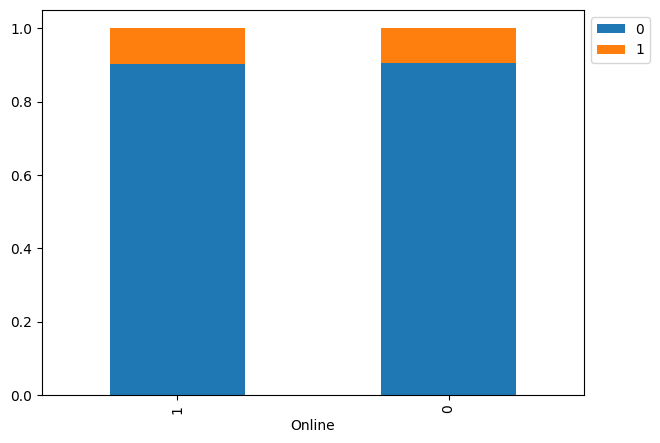

In [ ]:
stacked_barplot(loan, "Online", "Personal_Loan")

No difference whether a customer is online versus not online as a predictor.  This is a possible column to drop as it may introduce noise.

#### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


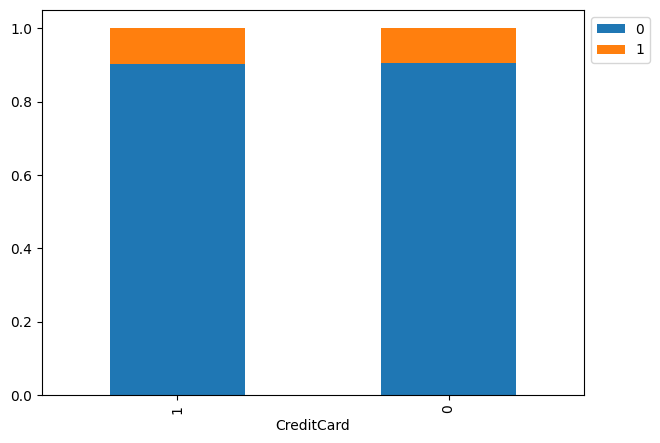

In [ ]:
stacked_barplot(loan, "CreditCard", "Personal_Loan")

Credit Card is not a good predictor of personal loan.  

#### Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


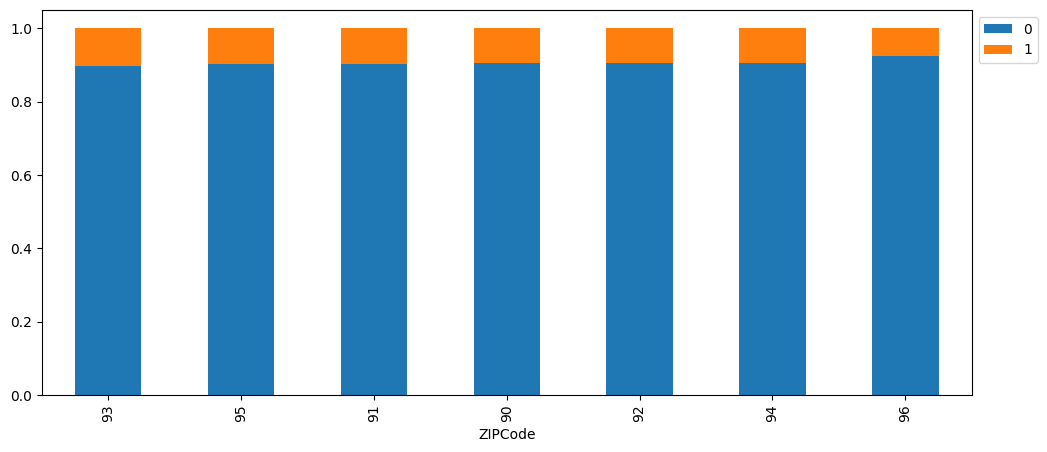

In [ ]:
stacked_barplot(loan, "ZIPCode", "Personal_Loan")

Very small variances between zip code and personal loan.  Zip code is not a good indicator of personal loan.  Another column to potentially drop.  

#### Customer's interest in purchasing a loan varies with their age

<ipython-input-33-d405489ef7b9>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-33-d405489ef7b9>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


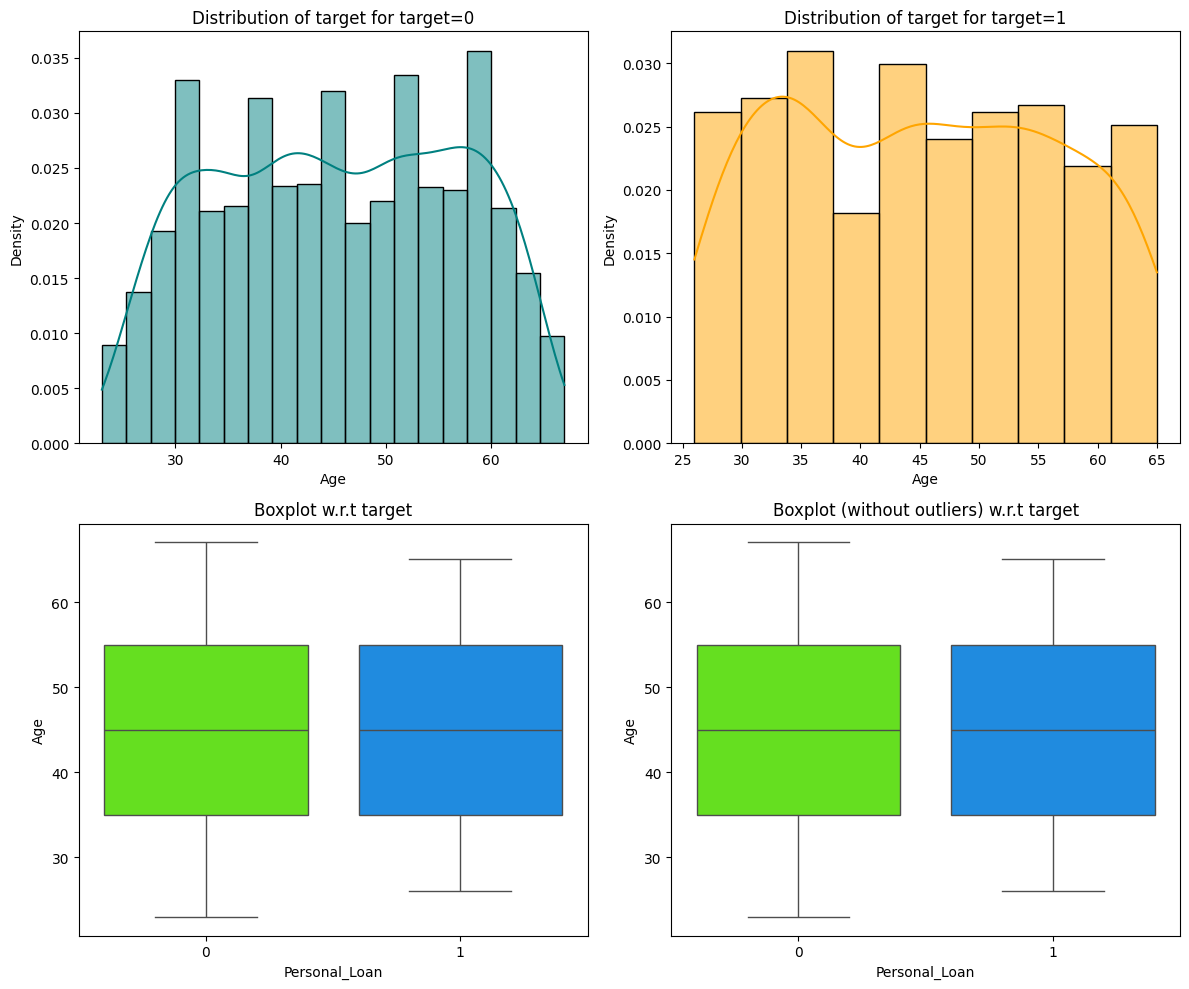

In [ ]:
distribution_plot_wrt_target(loan, "Age", "Personal_Loan")

Median age for personal loan was approximately 45 w/or without outliers.  Age does not seem like a good indicator for personal loan.  

#### Personal Loan vs Experience

<ipython-input-33-d405489ef7b9>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-33-d405489ef7b9>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


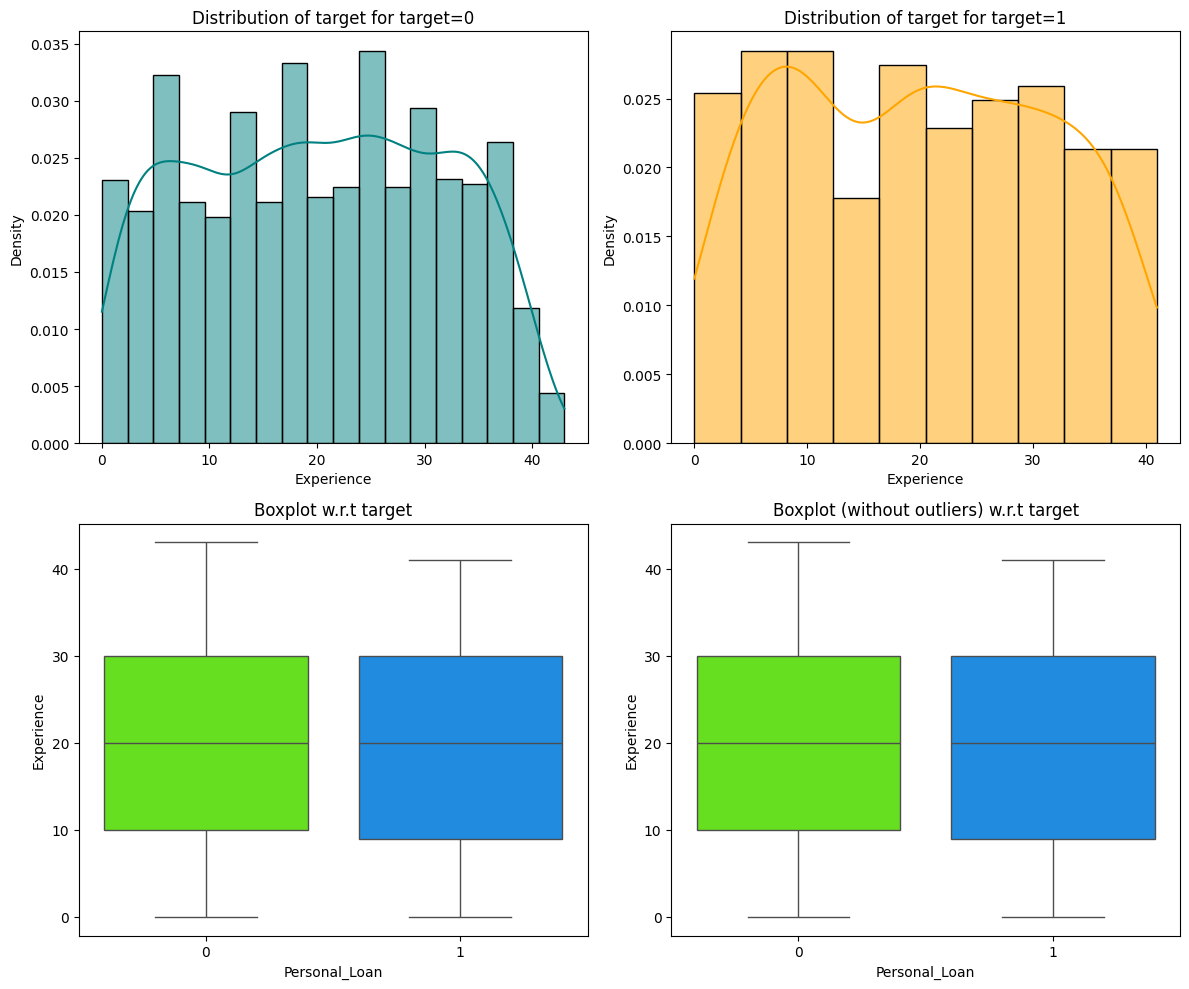

In [ ]:
distribution_plot_wrt_target(loan, "Experience", "Personal_Loan")

Personal loan does not seem to vary too significantly between age groups.  

#### Personal Loan vs Income

<ipython-input-33-d405489ef7b9>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-33-d405489ef7b9>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


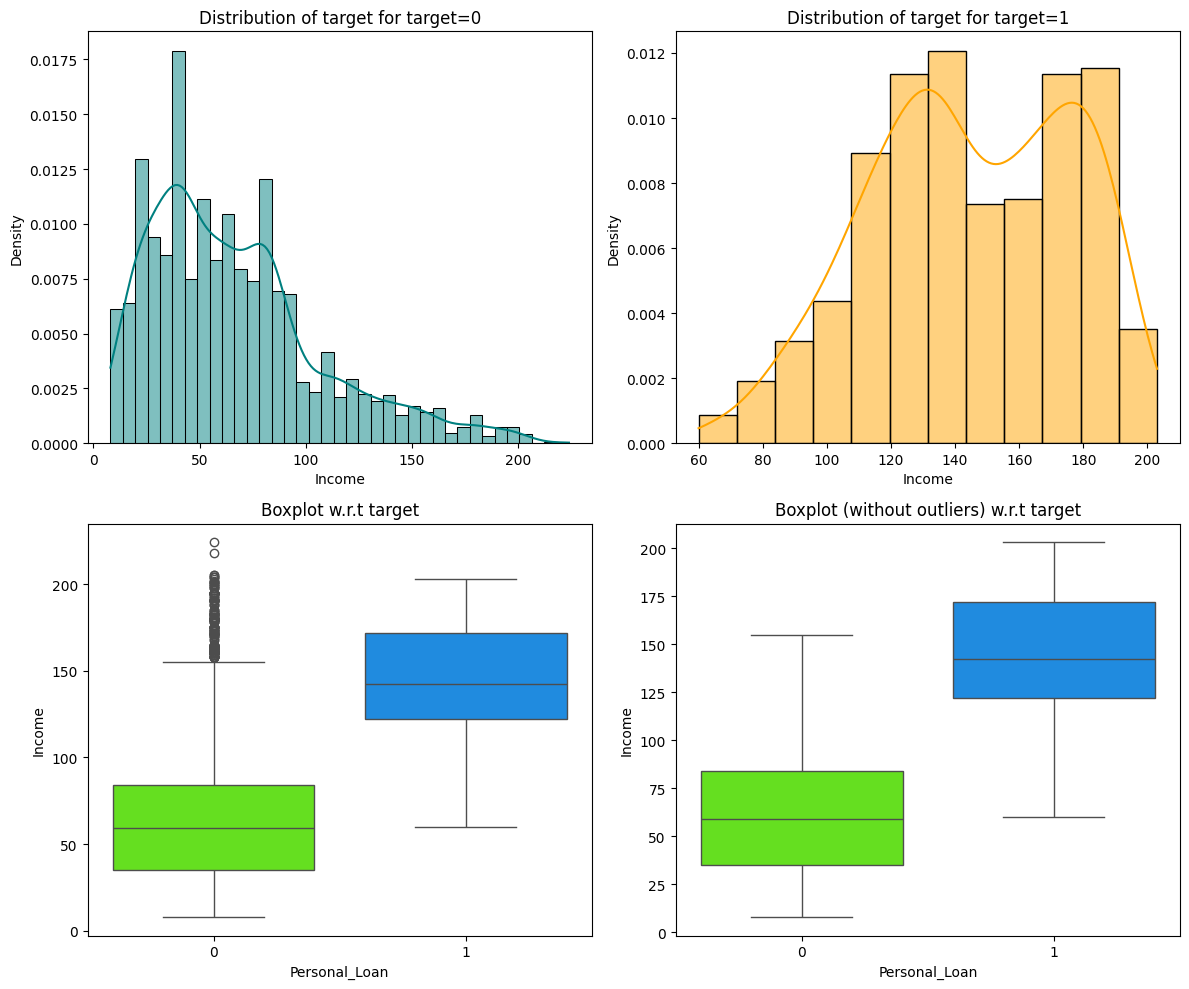

In [ ]:
distribution_plot_wrt_target(loan, "Income", "Personal_Loan")

Personal Loan rises substantially after 100 K in income.  There is a correlation of higher income and personal loans especially atht eh 120-140K and 170-190K.  

#### Personal Loan vs CCAvg

<ipython-input-33-d405489ef7b9>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-33-d405489ef7b9>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


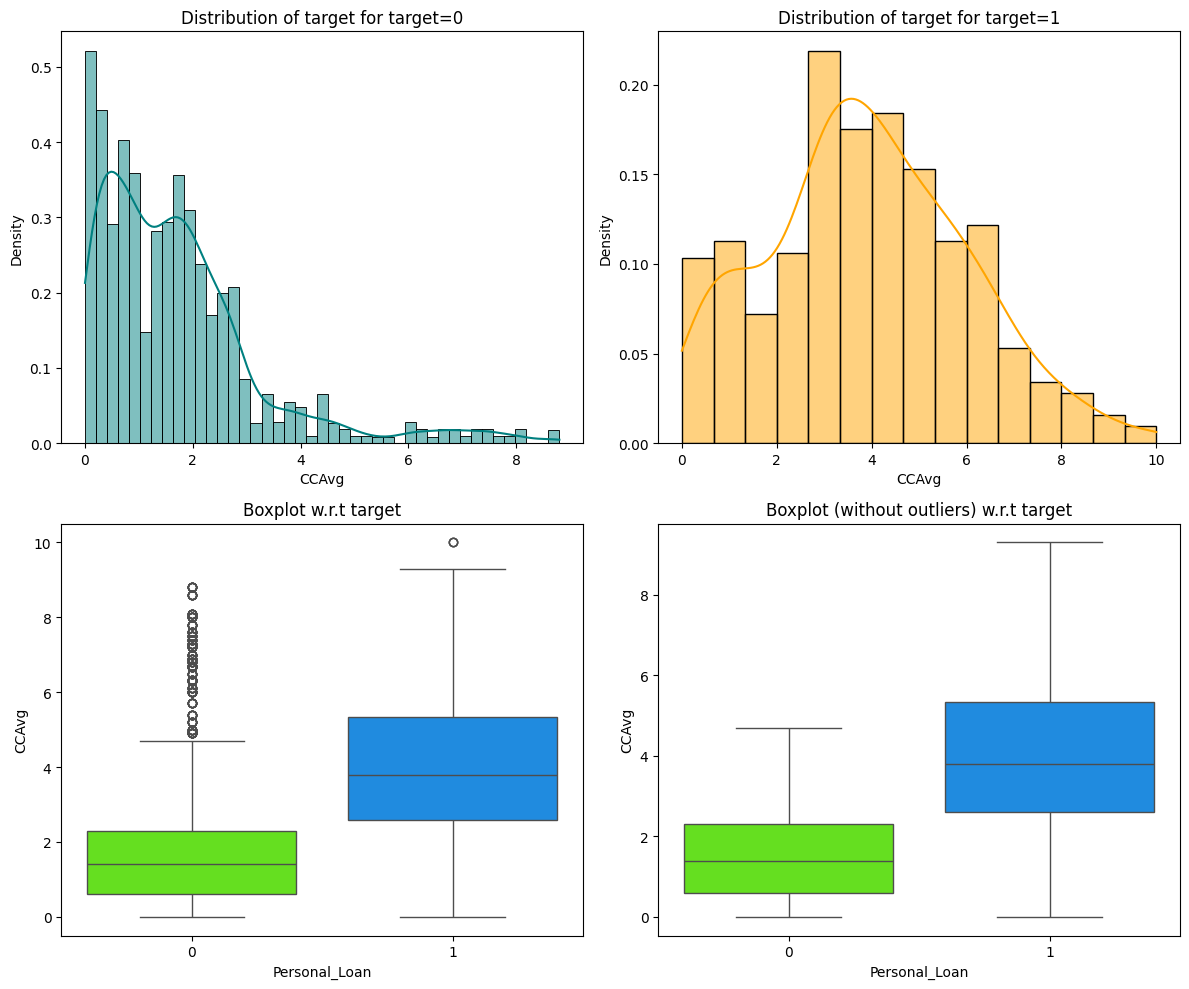

In [ ]:
distribution_plot_wrt_target(loan, "CCAvg", "Personal_Loan")

The CC averages with a median of 3.8K is is has a greater likelihood of getting a personal loan.  The amounts after 6.3K drops off substantially by 50%.  

## Data Preprocessing (contd.)

In [ ]:
Q1 = loan.quantile(.25)  # Complete the code to find the 25th percentile and 75th percentile.
Q3 = loan.quantile(.75)  # Complete the code to find the 75th percentile and 75th percentile.

IQR = Q3 - Q1               # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR


<ipython-input-46-13f1ee5359ee>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = loan.quantile(.25)  # Complete the code to find the 25th percentile and 75th percentile.
<ipython-input-46-13f1ee5359ee>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = loan.quantile(.75)  # Complete the code to find the 75th percentile and 75th percentile.


In [ ]:
((loan.select_dtypes(include=["float64", "int64"]) < lower)
    |(loan.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(loan) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

## Data Preparation for Modeling

In [ ]:
# Separate independent and dependent variable
X = loan.drop(["Personal_Loan", "Experience"], axis=1)
Y = loan["Personal_Loan"]


In [ ]:
# Apply dummies on ZIPCode and Education
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)


In [ ]:
# Complete the code to split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)     # shape of train data
print("Shape of test set : ", X_test.shape)        # shape of test data
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))              #value counts of y train data
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))           # Complete the code to get the value counts of y test data

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will take the personal loan but in reality the customer will not take the personal loan - Loss of resources
2. Predicting a customer will not take the personal loan but in reality the customer was going to take the personal loan - Loss of opportunity

**Which case is more important?**

> Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan.  Lost opportunity is a greater loss than loss of resources.  

**How to reduce this loss i.e need to reduce False Negatives?**

>Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.


### Model Building - First Pass without any improvements

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")

#### Build Decision Tree Model

In [ ]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)  ## Complete the code to fit decision tree on train data

DecisionTreeClassifier(random_state=1)

#### Check model performance on training data

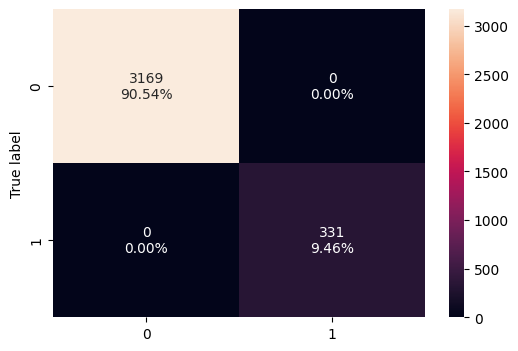

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Visualizing the Decision Tree

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


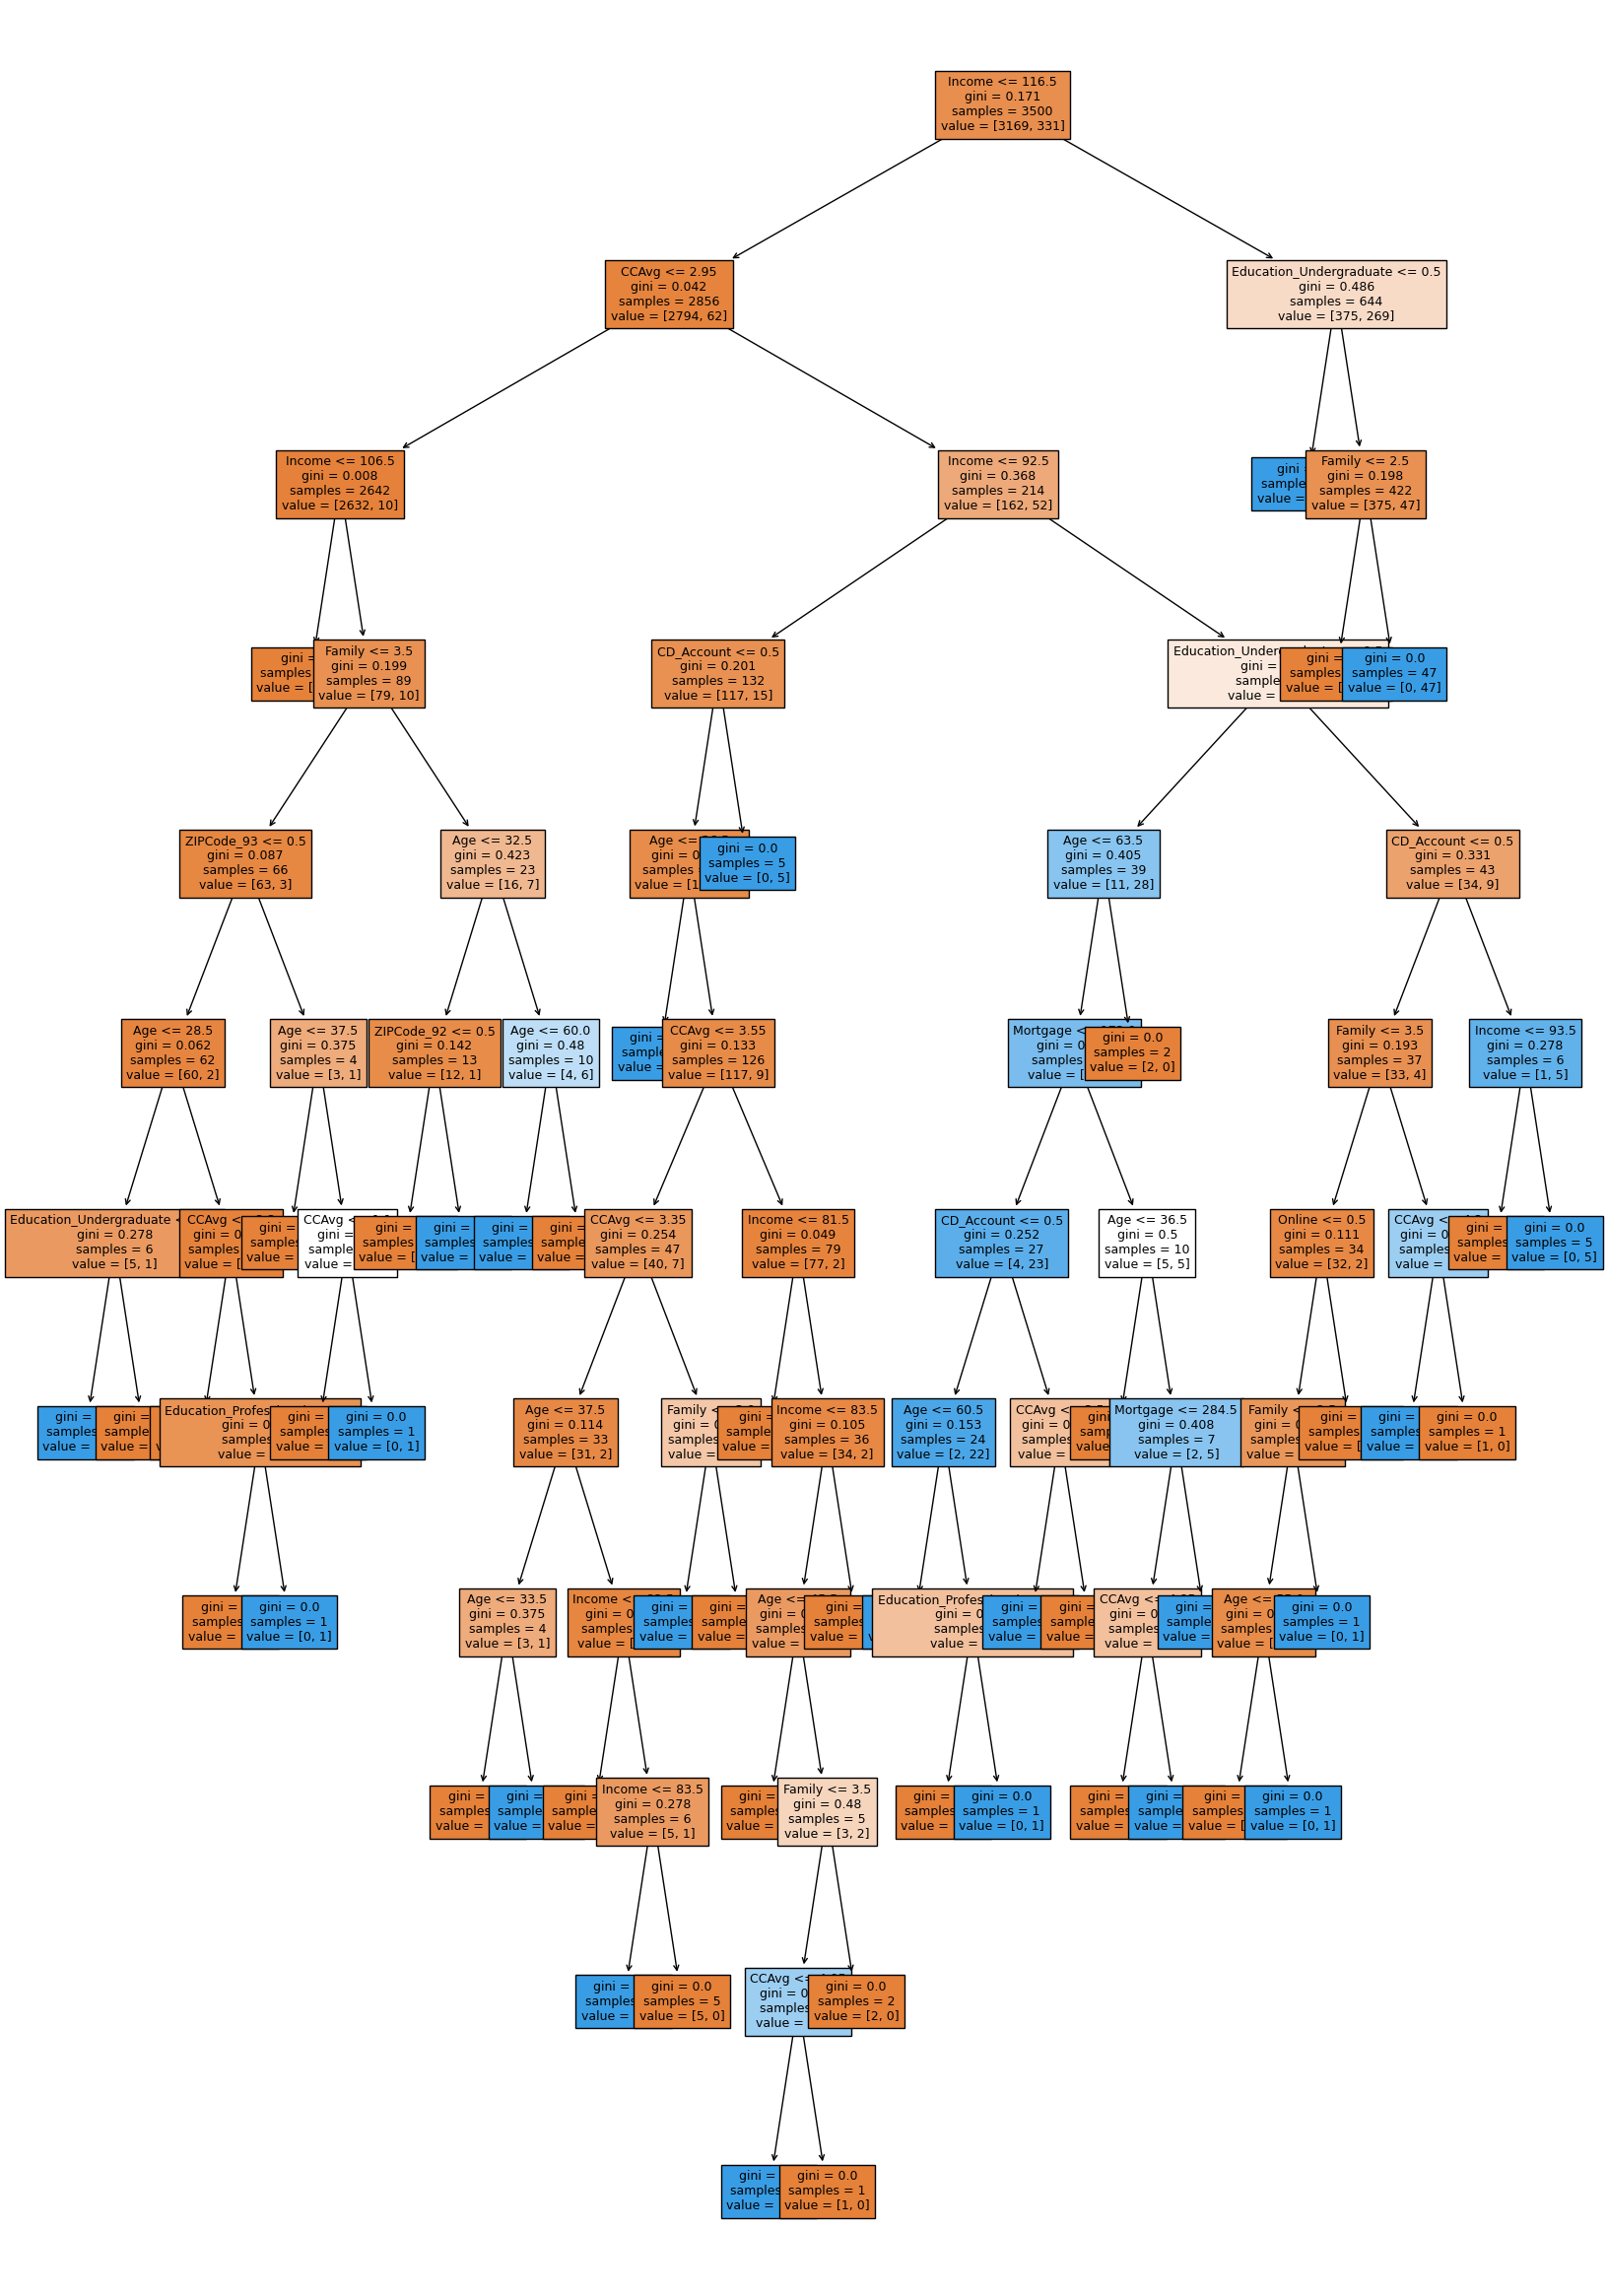

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403732
Income                   0.304761
Family                   0.161717
CCAvg                    0.053107
Age                      0.036035
CD_Account               0.025711
Mortgage                 0.005557
Education_Professional   0.005144
ZIPCode_92               0.003080
ZIPCode_93               0.000594
Online                   0.000561
Securities_Account       0.000000
ZIPCode_91               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
CreditCard               0.000000


We can see that Online, Securities Account and Credit Card has low Gini Importance.

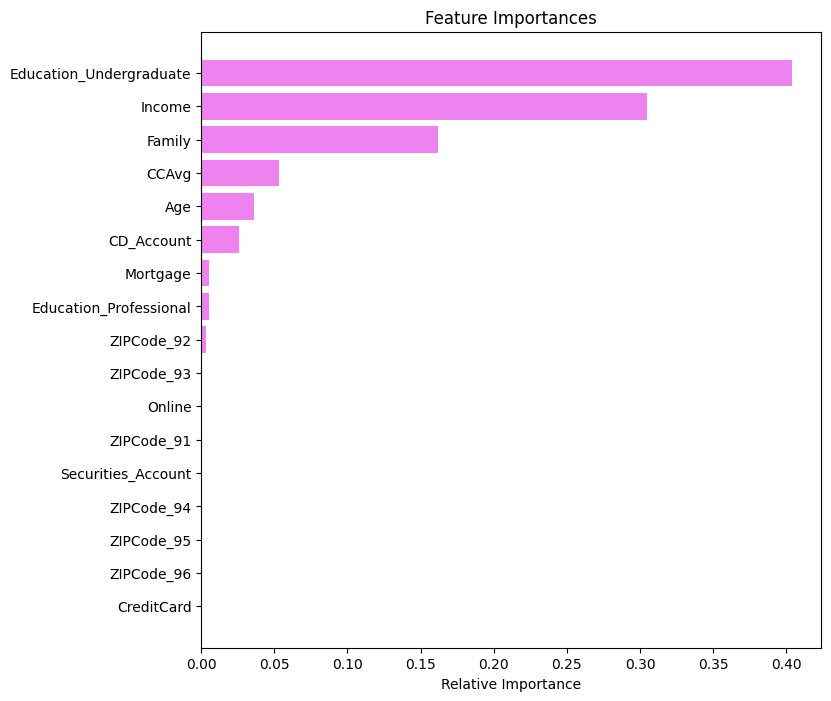

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Checking the model performance on test data

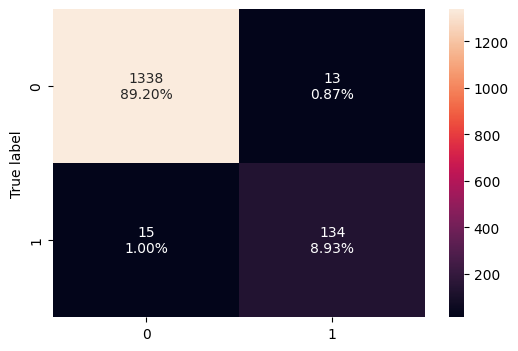

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)  # confusion matrix for test data

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.899329,0.911565,0.905405


First pass through without any tuning, Recall = 89.933% with a 98.133% accuracy

### Model Performance Improvement

#### Drop columns with low importance

In [ ]:
# Separate independent and dependent variable
X = loan.drop(["Personal_Loan", "Experience", "Online", "CreditCard", "Securities_Account", "ZIPCode"], axis=1)  # Create new independent variables by also dropping Credit Card, Online, Securities and Zip Code
Y = loan["Personal_Loan"]

In [ ]:
# Apply dummies on ZIPCode and Education
X = pd.get_dummies(X, columns=["Education"], drop_first=True)

In [ ]:
# Complete the code to split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)  ## fit decision tree on train data

DecisionTreeClassifier(random_state=1)

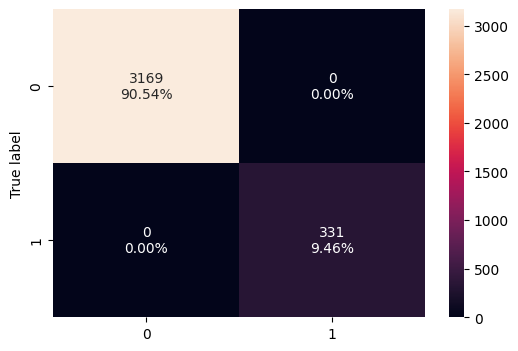

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_tune_train_drop = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_tune_train_drop

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'CD_Account', 'Education_Professional', 'Education_Undergraduate']


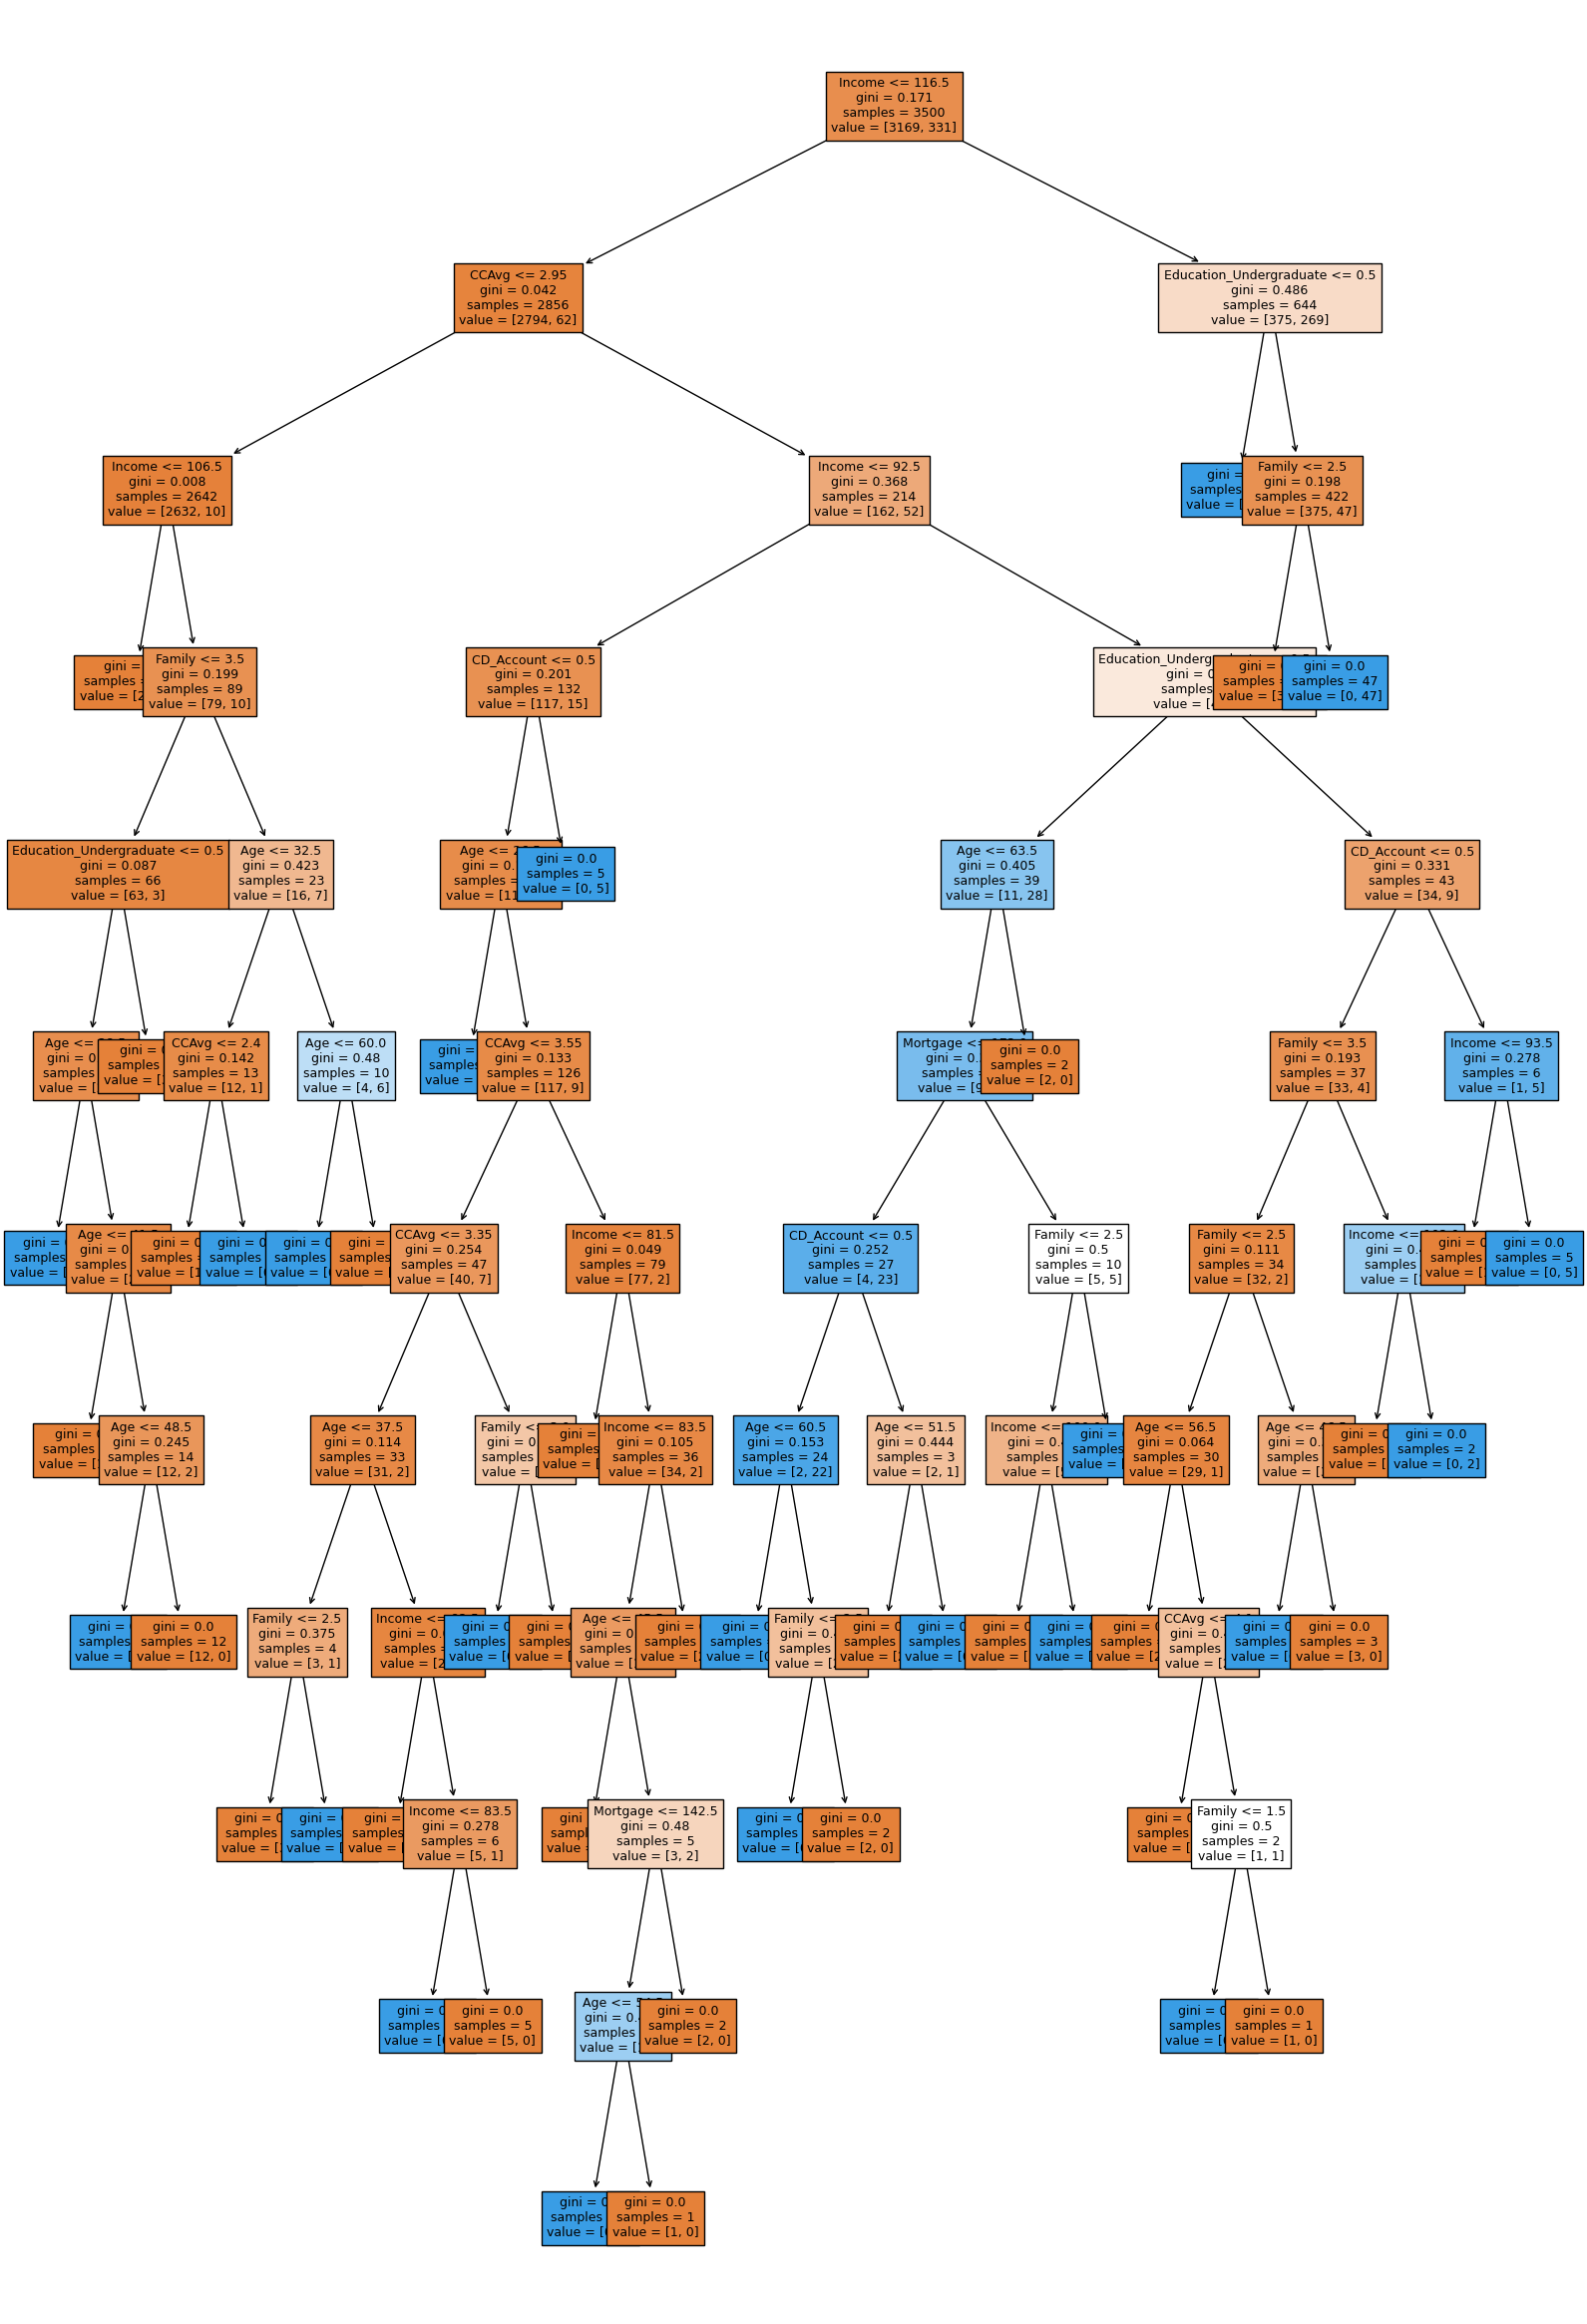

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- CCAvg <= 2.40
|   |   |   |   |   |   |--- w

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.401465
Income                   0.311753
Family                   0.167820
CCAvg                    0.045819
Age                      0.042637
CD_Account               0.025711
Mortgage                 0.004794
Education_Professional   0.000000


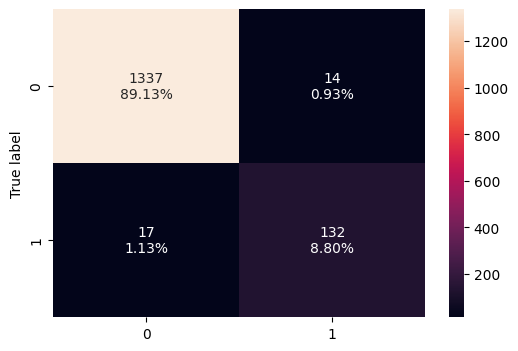

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)  # confusion matrix for test data

In [ ]:
decision_tree_tune_test_drop = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_tune_test_drop

,Accuracy,Recall,Precision,F1
0,0.979333,0.885906,0.90411,0.894915


**Eliminating some variables did increase the recall variable with a similar accuracy rate. False-Negative percent was lower at .93% versus 1% in the first pass.**

**From here, post pruning on the dropped columns model.  Seeing if this would be a better model.  Below, will look for optimized Recall given a set Alpha.**

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
models = []
recalls = []
accuracies = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    models.append(model)
    recalls.append(recall)
    accuracies.append(accuracy)

In [ ]:
series1 = pd.Series(accuracies, name='Accuracy')
series2 = pd.Series(recalls, name='Recall')
series3=pd.Series(ccp_alphas, name='Alphas')
result_acc_recl_alphas=pd.DataFrame({series1.name: series1,series2.name: series2, series3.name: series3})
print(result_acc_recl_alphas)

    Accuracy    Recall    Alphas
0   0.979333  0.885906  0.000000
1   0.980667  0.885906  0.000184
2   0.980667  0.885906  0.000223
3   0.980667  0.885906  0.000262
4   0.981333  0.879195  0.000268
5   0.980667  0.872483  0.000381
6   0.980667  0.872483  0.000381
7   0.980667  0.872483  0.000381
8   0.981333  0.872483  0.000409
9   0.981333  0.872483  0.000476
10  0.981333  0.872483  0.000527
11  0.980667  0.865772  0.000582
12  0.982000  0.885906  0.000593
13  0.984000  0.906040  0.000641
14  0.982667  0.892617  0.000769
15  0.981333  0.879195  0.000882
16  0.981333  0.865772  0.001552
17  0.980000  0.845638  0.002333
18  0.975333  0.751678  0.003024
19  0.975333  0.751678  0.003294
20  0.975333  0.751678  0.006473
21  0.962000  0.617450  0.023866
22  0.900667  0.000000  0.056365


#####Pre pruning combined with post pruning setting CCP_alpha = .000641

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=.000641, random_state=1)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000641, random_state=1)

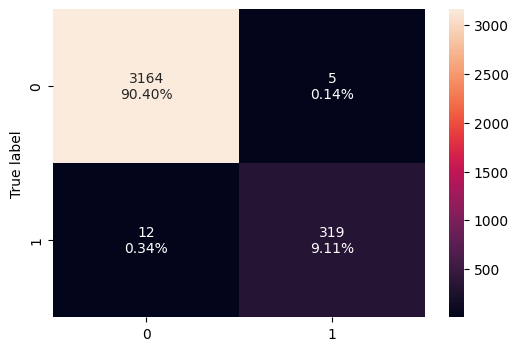

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_tune_train_drop_post = model_performance_classification_sklearn(model, X_train, y_train) ## check performance on train data
decision_tree_tune_train_drop_post

,Accuracy,Recall,Precision,F1
0,0.995143,0.963746,0.984568,0.974046


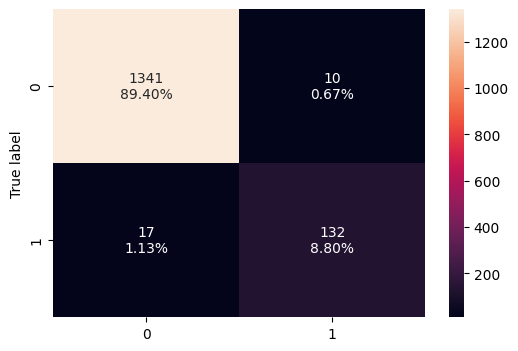

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_tune_test_drop_post = model_performance_classification_sklearn(model, X_test, y_test) ## check performance on train data
decision_tree_tune_test_drop_post

,Accuracy,Recall,Precision,F1
0,0.982,0.885906,0.929577,0.907216


**Setting the CCP_Alpha at the optimal level of .000641 did not improve the recall or the Negative-Positive percentage.**

#### Pre-Pruning

##### Pre-Pruning limit tree size

In [ ]:
# Separate independent and dependent variable
X = loan.drop(["Personal_Loan", "Experience"], axis=1)
Y = loan["Personal_Loan"]
# Apply dummies on ZIPCode and Education
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
# Complete the code to split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

**Checking performance on training data**

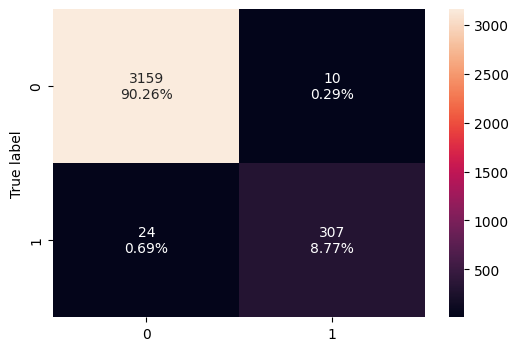

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) ## check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


**Visualizing the Decision Tree**

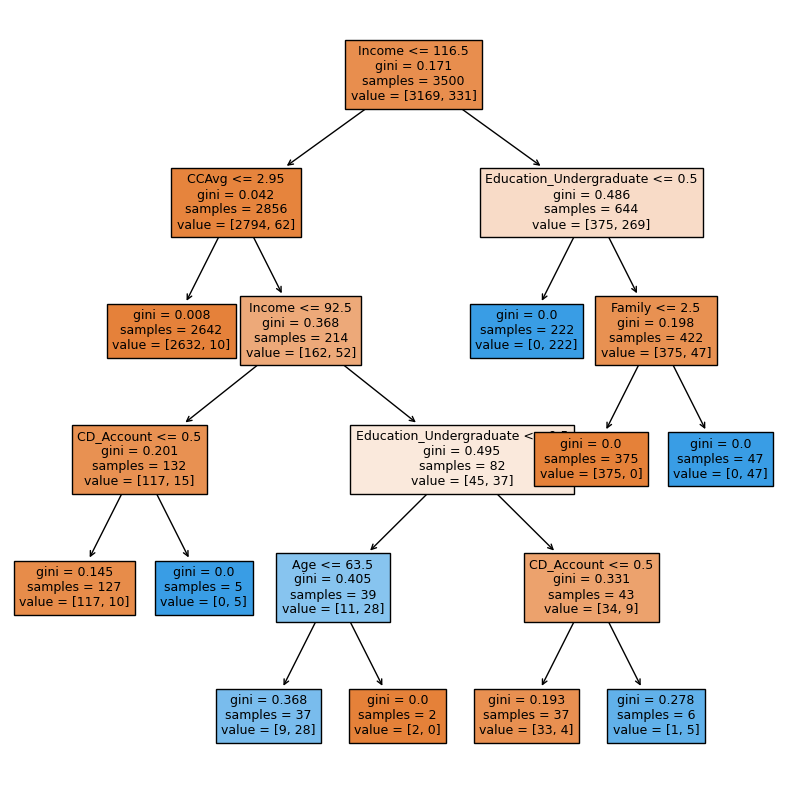

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.

In [ ]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.446191
Income                   0.327387
Family                   0.155083
CCAvg                    0.042061
CD_Account               0.025243
Age                      0.004035
Securities_Account       0.000000
Online                   0.000000
Mortgage                 0.000000
ZIPCode_91               0.000000
ZIPCode_92               0.000000
ZIPCode_93               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000
CreditCard               0.000000


In [ ]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.446191
Income                   0.327387
Family                   0.155083
CCAvg                    0.042061
CD_Account               0.025243
Age                      0.004035
Securities_Account       0.000000
Online                   0.000000
Mortgage                 0.000000
ZIPCode_91               0.000000
ZIPCode_92               0.000000
ZIPCode_93               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000
CreditCard               0.000000


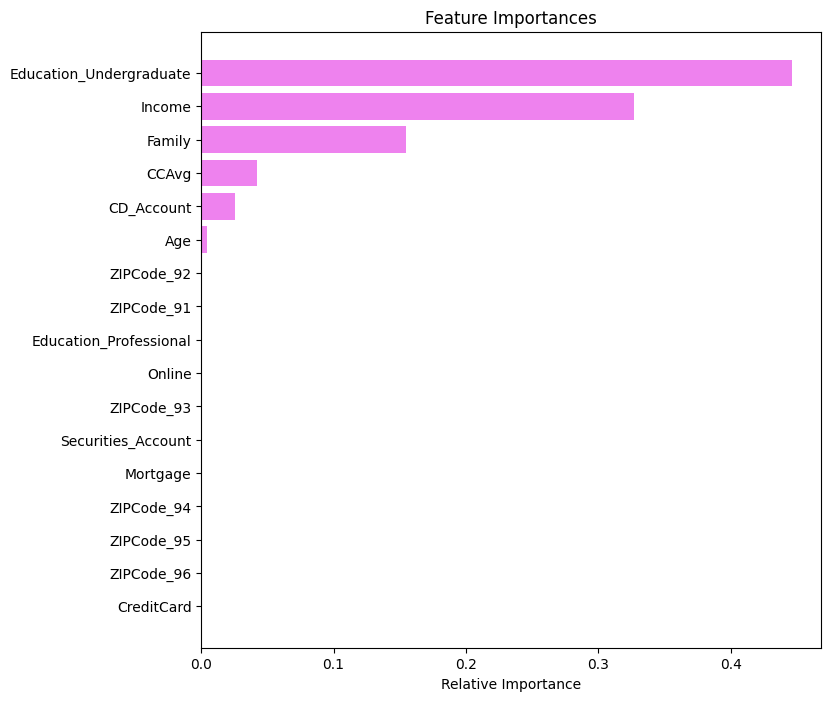

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

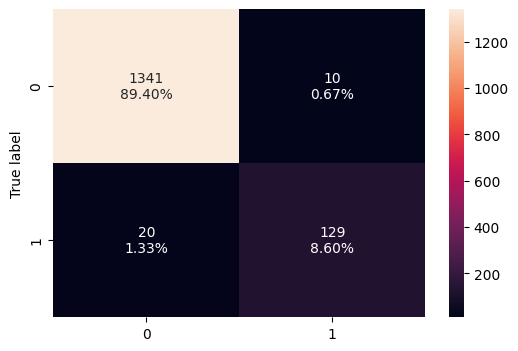

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test )

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


**Pre-Pruning resulted in a lower recall rate and a higher Negative-Positive number of 1.33% versus 1.0% pre tuned.**

#### Cost-Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000214,0.000429
2,0.000223,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000381,0.006423


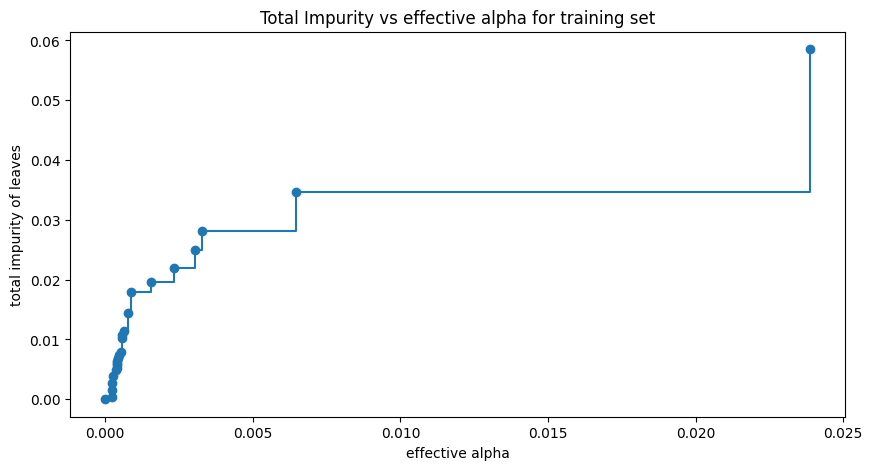

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_test, y_test)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 5 with ccp_alpha: 0.056364969335601575


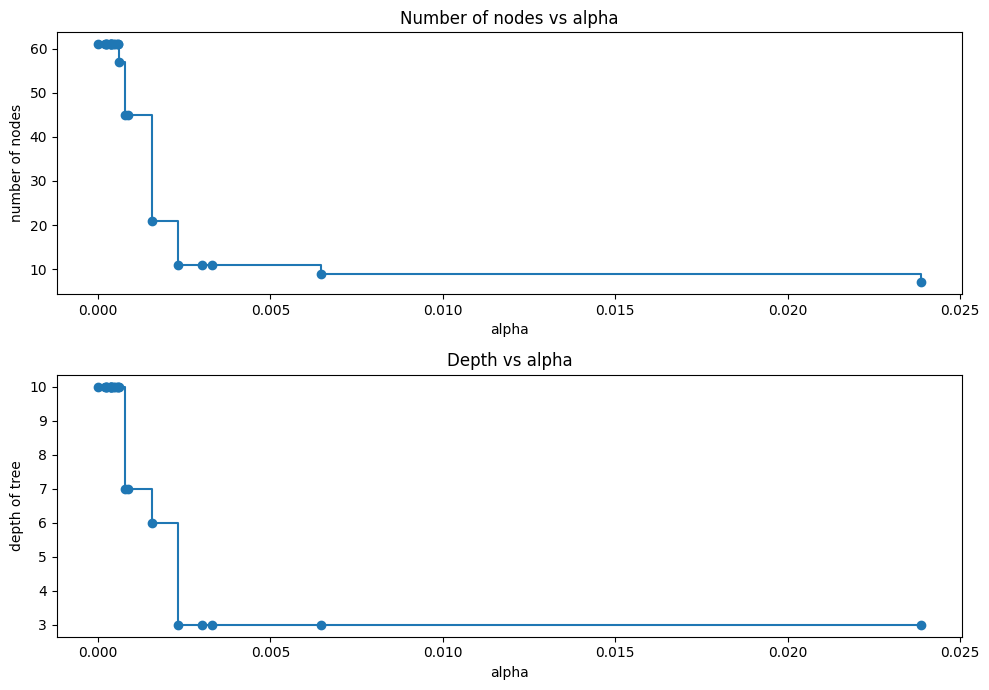

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
models = []
recalls = []
accuracies = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    models.append(model)
    recalls.append(recall)
    accuracies.append(accuracy)




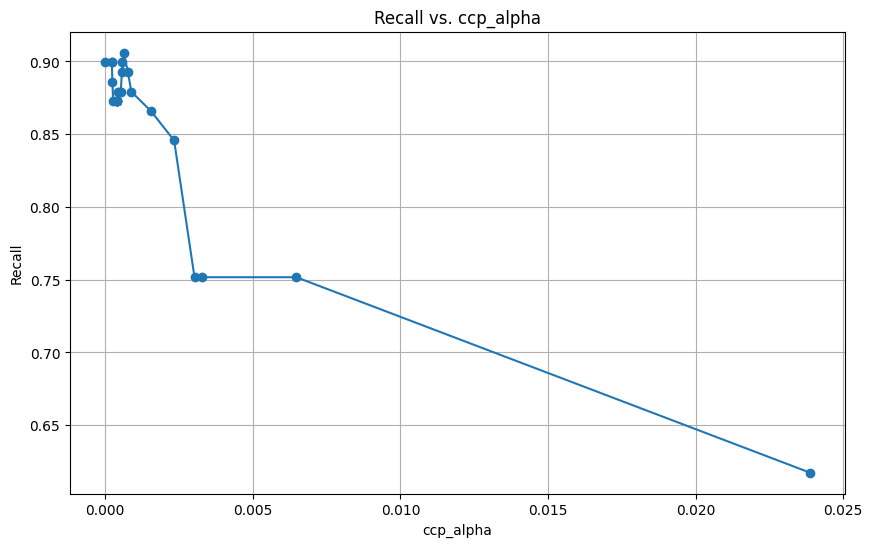

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, recalls, marker='o', linestyle='-')
plt.title("Recall vs. ccp_alpha")
plt.xlabel("ccp_alpha")
plt.ylabel("Recall")
plt.grid(True)
plt.show()

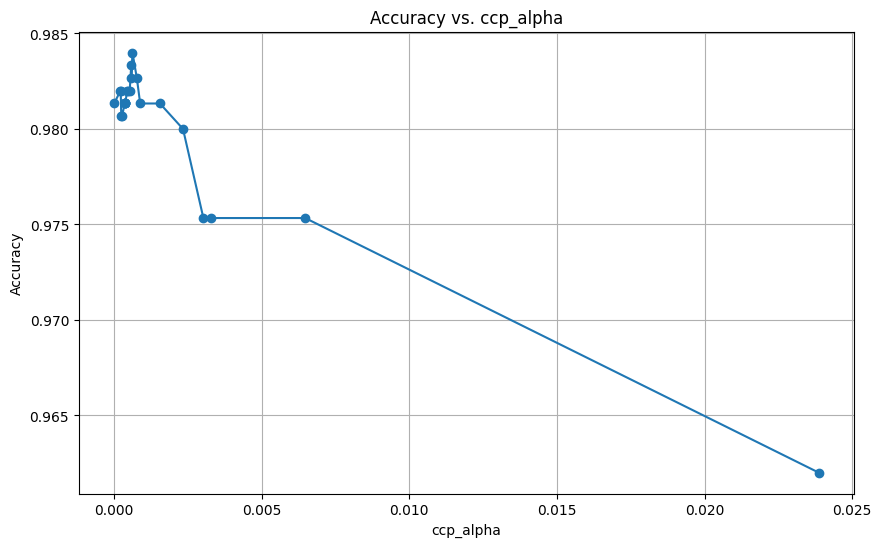

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, accuracies, marker='o', linestyle='-')
plt.title("Accuracy vs. ccp_alpha")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
series1 = pd.Series(accuracies, name='Accuracy')
series2 = pd.Series(recalls, name='Recall')
series3=pd.Series(ccp_alphas, name='Alphas')
result_acc_recl_alphas=pd.DataFrame({series1.name: series1,series2.name: series2, series3.name: series3})
print(result_acc_recl_alphas)

    Accuracy    Recall    Alphas
0   0.981333  0.899329  0.000000
1   0.982000  0.899329  0.000214
2   0.982000  0.899329  0.000223
3   0.980667  0.885906  0.000242
4   0.980667  0.872483  0.000268
5   0.981333  0.872483  0.000359
6   0.981333  0.872483  0.000381
7   0.981333  0.872483  0.000381
8   0.981333  0.872483  0.000381
9   0.981333  0.872483  0.000381
10  0.982000  0.879195  0.000435
11  0.982000  0.879195  0.000476
12  0.982000  0.879195  0.000527
13  0.983333  0.899329  0.000578
14  0.982667  0.892617  0.000582
15  0.984000  0.906040  0.000621
16  0.982667  0.892617  0.000769
17  0.981333  0.879195  0.000882
18  0.981333  0.865772  0.001552
19  0.980000  0.845638  0.002333
20  0.975333  0.751678  0.003024
21  0.975333  0.751678  0.003294
22  0.975333  0.751678  0.006473
23  0.962000  0.617450  0.023866


**Based on maximizing the recall value while maintaining a high accuracy, the best Alpha to choose would be .000621. Accuracy = 98.4% and Recall = 90.604%**

##### Rerun the model with Alpha = .000621


In [ ]:
# Create the DecisionTreeClassifier with ccp_alpha = .000621 for pruning
model = DecisionTreeClassifier(ccp_alpha=.000621, random_state=1)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000621, random_state=1)

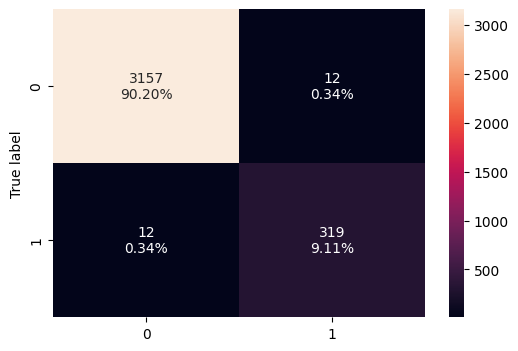

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_post_train = model_performance_classification_sklearn(model, X_train, y_train) ## check performance on train data
decision_tree_post_train

,Accuracy,Recall,Precision,F1
0,0.993143,0.963746,0.963746,0.963746


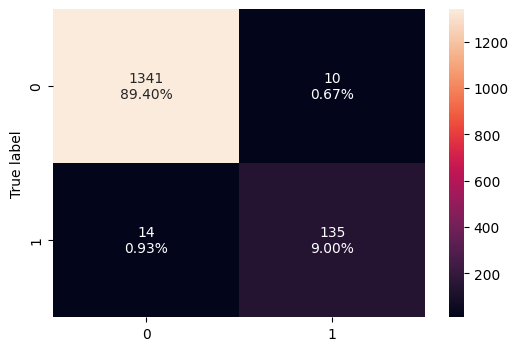

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)  # confusion matrix for test data

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.984,0.90604,0.931034,0.918367


The best model result is using CCP_Alpha = .000621

## Model Comparison and Final Model Selection

**Key to the Table**
1. Decision Tree sklearn: No pre or post pruning
2. Decision Tree (PP - Drop Columns): Drop Credit Card, Online, Securities and Zip Code
3. Decision Tree(Limit Tree Size): Pre-Pruning by limiting tree size
4. Post Pruning by setting CCP_Alpha to .000621

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_train_drop.T,decision_tree_tune_train_drop_post.T, decision_tree_tune_train.T, decision_tree_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (PP - Drop Columns)","Decision Tree (PP - Drop + CCP_Alpha)", "Decision Tree(Limit Tree Size)", "Decision Tree (CCP_Alpha)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (PP - Drop Columns),Decision Tree (PP - Drop + CCP_Alpha),Decision Tree(Limit Tree Size),Decision Tree (CCP_Alpha)
Accuracy,1.0,1.0,0.995143,1.0,0.993143
Recall,1.0,1.0,0.963746,1.0,0.963746
Precision,1.0,1.0,0.984568,1.0,0.963746
F1,1.0,1.0,0.974046,1.0,0.963746


In [ ]:
# Testing performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_test_drop.T,decision_tree_tune_test_drop_post.T, decision_tree_tune_test.T, decision_tree_post_test.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (PP - Drop Columns)","Decision Tree (PP - Drop + CCP_Alpha)", "Decision Tree(Limit Tree Size)", "Decision Tree (CCP_Alpha)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (PP - Drop Columns),Decision Tree (PP - Drop + CCP_Alpha),Decision Tree(Limit Tree Size),Decision Tree (CCP_Alpha)
Accuracy,0.981333,0.979333,0.982000,0.98000,0.984000
Recall,0.899329,0.885906,0.885906,0.90604,0.906040
Precision,0.911565,0.904110,0.929577,0.89404,0.931034
F1,0.905405,0.894915,0.907216,0.90000,0.918367


**The best model was to retain all columns and post prune the decision tree by setting CCP_Alpha = .000621**

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

I would suggest the following:
1. Use the model where you only eliminate ID and Experience but set the CCP_Alpha to .000621

2. The fields with the great influence on personal loans are

  a. Education: Professional

  b. Income (typically between 100K and 195K)

  c. Family (the higher the amount, the more likely)

  d. CC Average

  e. Age

___